# Decision Tree Practice 
Date: 06/27/2025

[Data Set Link](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc)

In [16]:
# Bring in the data
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
# Random Resampling
import imblearn
print(imblearn.__version__)

0.13.0


In [2]:
path = kagglehub.dataset_download("vikramamin/bank-loan-approval-lr-dt-rf-and-auc")

file_name = os.listdir(path)[0]

df = pd.read_csv(os.path.join(path, file_name))

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


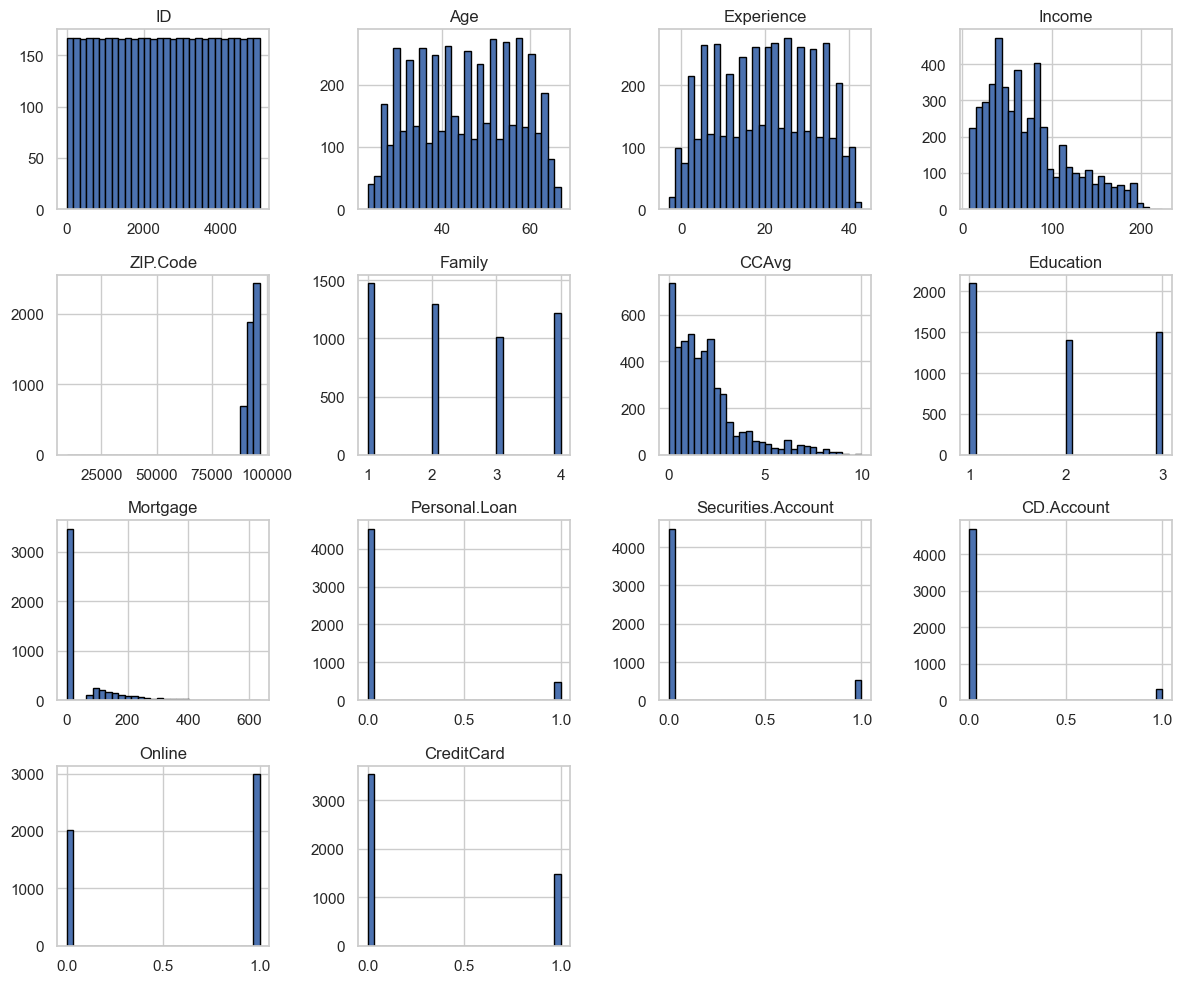

In [5]:
sns.set(style="whitegrid")

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

<Axes: >

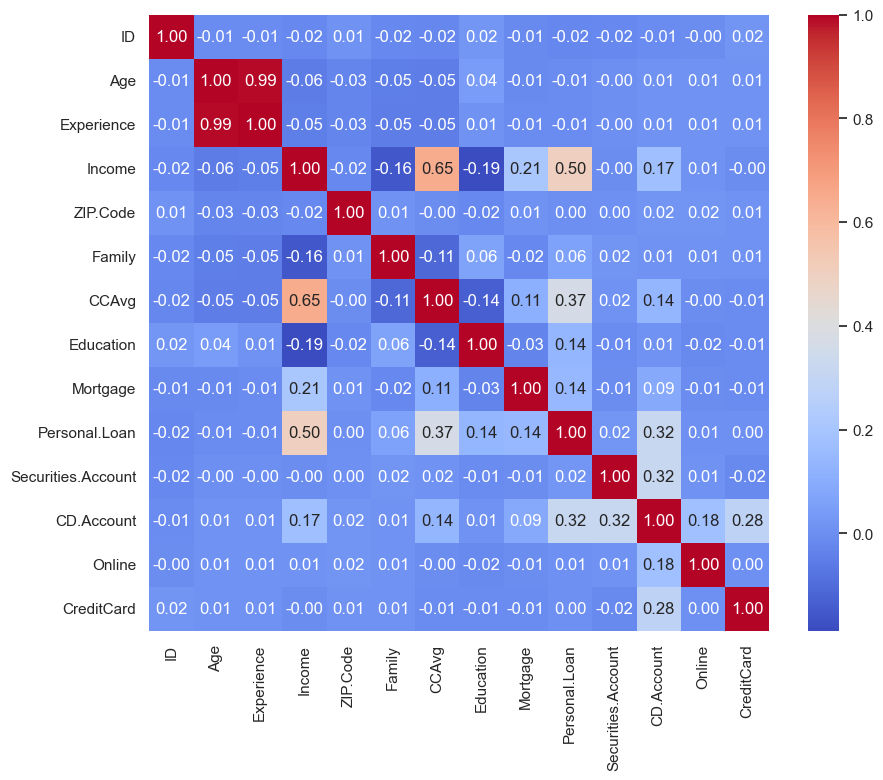

In [48]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize = (10,8))

sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'coolwarm', fmt = ".2f")

Going to start decision 

In [6]:
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

# Set stratify to y to ensure that proportions are preserved for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train size: {y_train.size}")
print(f"y_test size: {y_test.size}")

X_train shape: (4000, 13)
X_test shape: (1000, 13)
y_train size: 4000
y_test size: 1000


In [8]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

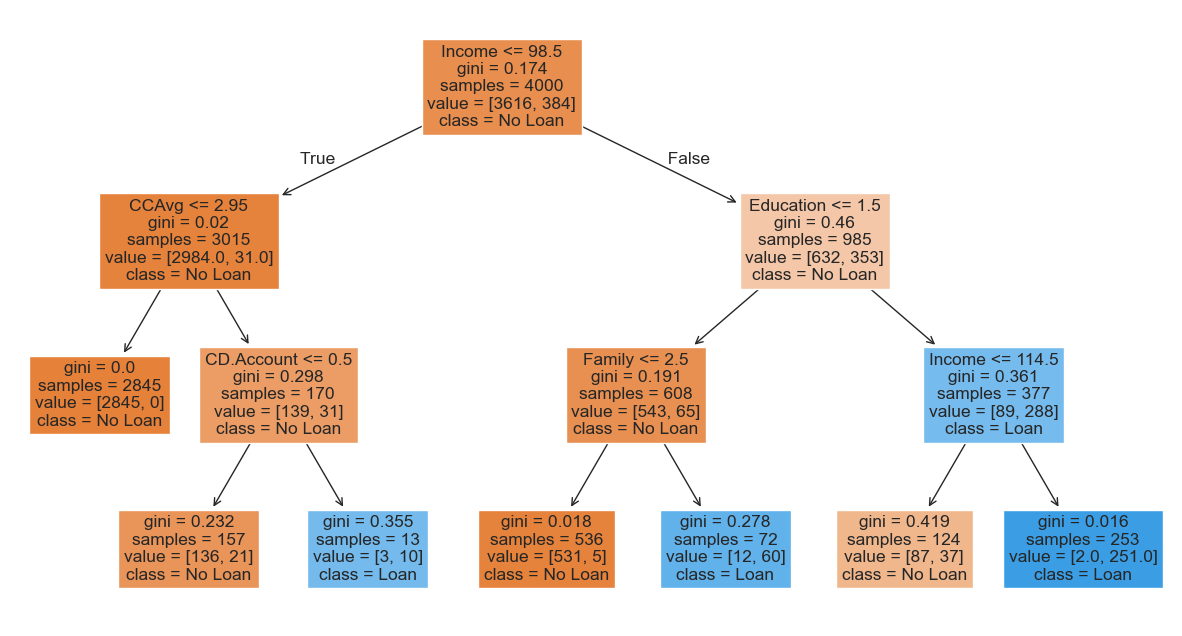

In [9]:
plt.figure(figsize=(15, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No Loan', 'Loan'])
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Noticing that the model does a bad job predicting Loan

Accuracy: 0.9810


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.88      0.93      0.90        96

    accuracy                           0.98      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[892  12]
 [  7  89]]


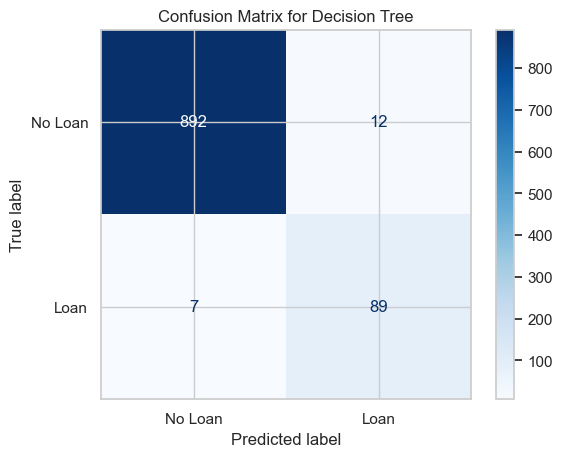

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Loan", "Loan"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

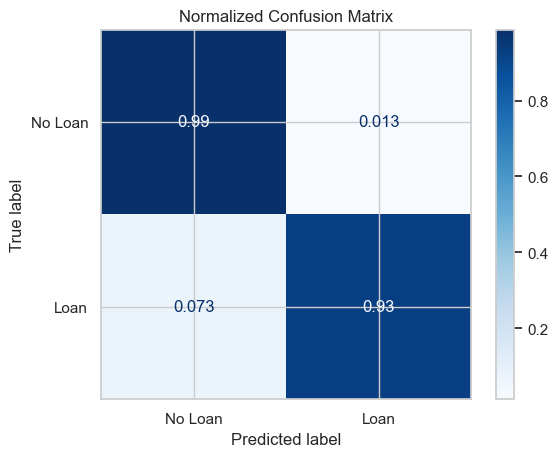

In [14]:
# we wil look at precision (higher emphasis on FP) here becausae we do not want to be giving loans to individuals that are unlikely to pay back the loan
disp = ConfusionMatrixDisplay.from_estimator(
    tree,
    X_test,
    y_test,
    display_labels=["No Loan", "Loan"],
    cmap=plt.cm.Blues,
    normalize="true"
)
plt.title("Normalized Confusion Matrix")
plt.show()

## Sampling Techniques

Notes: 
- Random Resampling: Naive technique for rebalancing the class distribution for an imbalanced dataset
    - Random Selection with replacement.
    - In some cases, seeking a balanced distribution for a severly imbalanced dataset can cause affected algorithms to overfit the minority class, leading to increased generalization error.
    - <span style="color: cyan;">RandomOverSampler() </span> class
- Random Oversampling: Duplicates examples from the minority class in the training set --> overfitting
- Random Undersampling: Deletes examples from the majority class and can result in losing information to the model

---
#### Random Undersampling

In [18]:
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = "minority")

# define the oversampling strategy 
# sampling_strategy = 0.5 => ensures minority class oversamples to have half the number of examples as the majority class)

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) # only resample training

print(Counter(y_train_over)) # dataset is now balanced

Counter({0: 3616, 1: 3616})


In [20]:
# Retraining using pipeline from the imblearn library 
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]

pipeline = Pipeline(steps = steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[889  15]
 [  5  91]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       904
           1       0.86      0.95      0.90        96

    accuracy                           0.98      1000
   macro avg       0.93      0.97      0.94      1000
weighted avg       0.98      0.98      0.98      1000



In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[889  15]
 [  5  91]]


---
#### Random Undersampling

Things to consider: 
- Vast quantities of data are removed, thus when we lose data - we are at risk for making the decision boundary between the minority and majority instances harder to learn which could lead to a loss in classficiation performance. 

In [26]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy= 'majority')

# we should expect ~ 500 records in the majority class now 
# setting sampling_strategy to a float here is setting the ratio for the minority/majority 

# Undersampleing
print(f"Distribution before: {Counter(y_train)}")

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print(f"Distribution after undersampling: {Counter(y_train_under)}")

# Define Steps
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]

pipeline = Pipeline(steps = steps)

pipeline.fit(X_train_under, y_train_under)

y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix 

undersample_cm = confusion_matrix(y_test, y_pred)

print(undersample_cm)

Distribution before: Counter({0: 3616, 1: 384})
Distribution after undersampling: Counter({0: 384, 1: 384})
[[857  47]
 [  0  96]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       904
           1       0.67      1.00      0.80        96

    accuracy                           0.95      1000
   macro avg       0.84      0.97      0.89      1000
weighted avg       0.97      0.95      0.96      1000

[[857  47]
 [  0  96]]


--- 
#### Hybrid Undersampling and Oversampling

Combination of oversampling and undersampling

In [41]:
print(f"Class Distribution Before: {Counter(y_train)}")

# Find Current Minority/Majority Ratio 
majority_class_count = max(Counter(y_train).values())
minority_class_count = min(Counter(y_train).values())

# Current Ratio
print(f"Minority / Majority Ratio: {minority_class_count/majority_class_count}")

hybrid_over_sampling = RandomOverSampler(sampling_strategy=0.15) # oversample maj to 5:10 ratio
hybrid_under_sampling = RandomUnderSampler(sampling_strategy= 0.2) # undersample to 2:10 ratio 

# Pipeline setup
steps = [('over', hybrid_over_sampling), ('under', hybrid_under_sampling), ('model', DecisionTreeClassifier())]
hybrid_pipeline = Pipeline(steps = steps)

# Check Distributions 
X_temp, y_temp = Pipeline([
    ('over', hybrid_over_sampling),
    ('under', hybrid_under_sampling)
]).fit_resample(X_train, y_train)

print(f"After hybrid resampling: {Counter(y_temp)}")

del X_temp, y_temp

# Fit & Predict 
hybrid_pipeline.fit(X_train, y_train)
y_predictions_hybrid = hybrid_pipeline.predict(X_test)

# Results
cm = confusion_matrix(y_test, y_pred)
print(cm)

Class Distribution Before: Counter({0: 3616, 1: 384})
Minority / Majority Ratio: 0.10619469026548672
After hybrid resampling: Counter({0: 2710, 1: 542})
[[857  47]
 [  0  96]]


---- 
#### SMOTE 
Synthetic Minority Oversampling Technique: <span style="color:orange;"> Nitesh Chawla, et al. (2002) </span>

Description: Minority classes are hard to learn because there are too few examples; thus, it's hard to effectively learn a decision boundary

Random oversampling can balance the class distribution but does not provide any additional information to the model. 

Selecting examples from the minority class that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. 

… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

[SMOTE: Syntehic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813) Suggests that the combination of SMOTE and under-sampling performs better than plain under-sampling. 


=== k = 1 ===


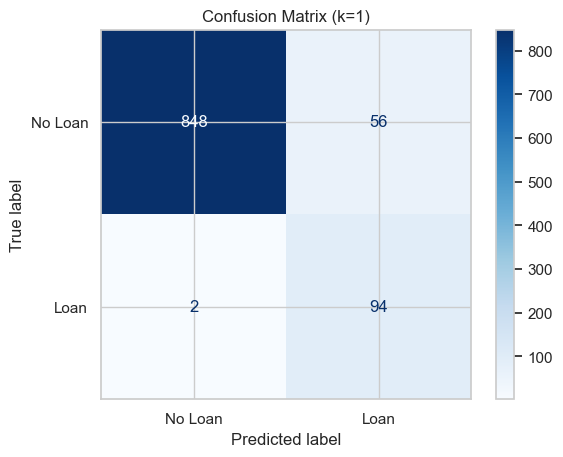

Accuracy (k=1): 0.9420

=== k = 2 ===


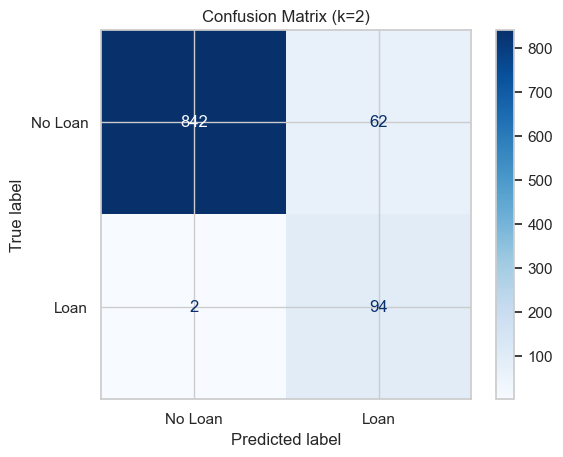

Accuracy (k=2): 0.9360

=== k = 3 ===


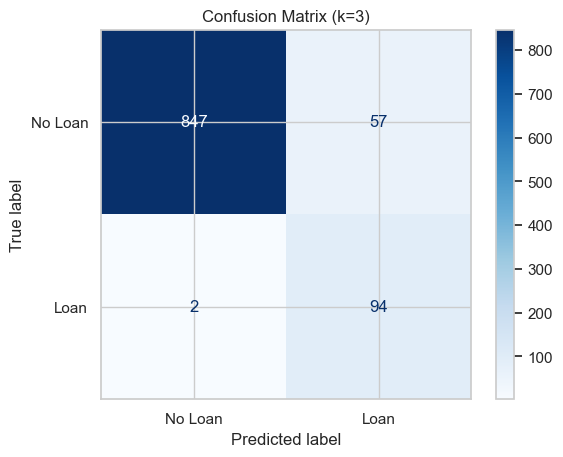

Accuracy (k=3): 0.9410

=== k = 4 ===


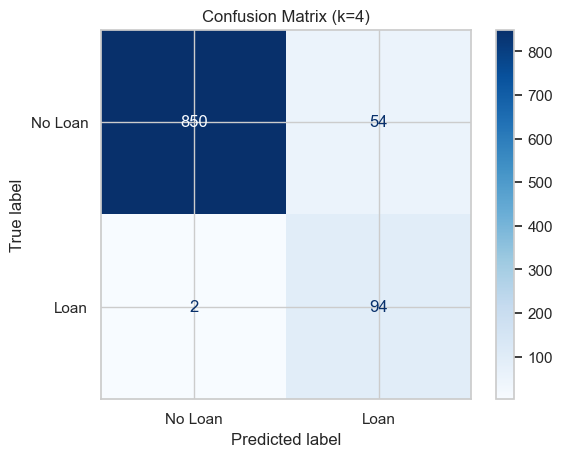

Accuracy (k=4): 0.9440

=== k = 5 ===


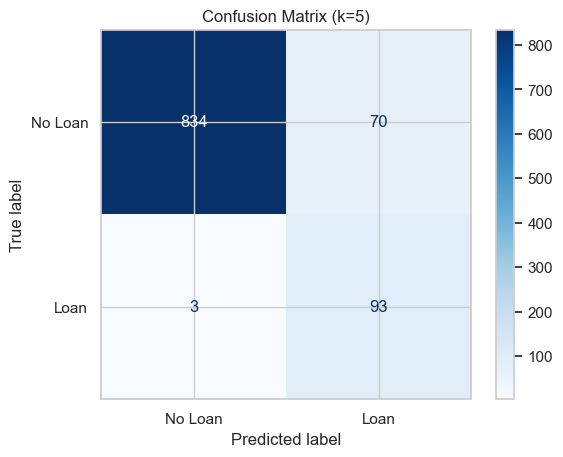

Accuracy (k=5): 0.9270

=== k = 6 ===


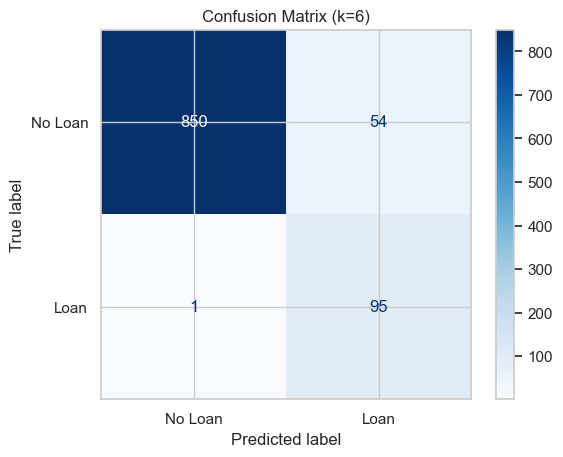

Accuracy (k=6): 0.9450

=== k = 7 ===


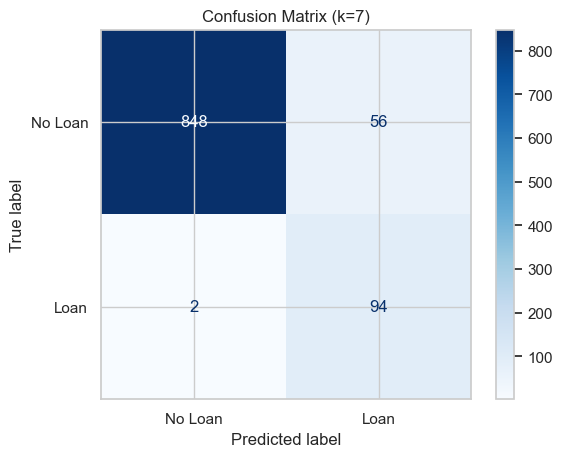

Accuracy (k=7): 0.9420


In [70]:
from imblearn.over_sampling import SMOTE
from numpy import where 
from numpy import mean


k_values = [1, 2, 3, 4, 5, 6, 7]

for k in k_values:
    print(f"\n=== k = {k} ===")

    model = DecisionTreeClassifier(random_state=42)

    # Flip the sampling order: under first, then SMOTE
    under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Cut majority in half
    over = SMOTE(sampling_strategy=1.0, k_neighbors=k, random_state=42)  # Match minority to majority

    steps = [('under', under), ('over', over), ('model', model)]
    pipeline = Pipeline(steps=steps)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Loan", "Loan"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (k={k})")
    plt.show()

    # Accuracy Print
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (k={k}): {accuracy:.4f}")